In [1]:
# Step 1: Install pip in python
!pip install -q opencv-python

In [2]:
# Step 2: Load and Display the Image
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Load the image
image = cv2.imread('Road.jpg') 
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) 

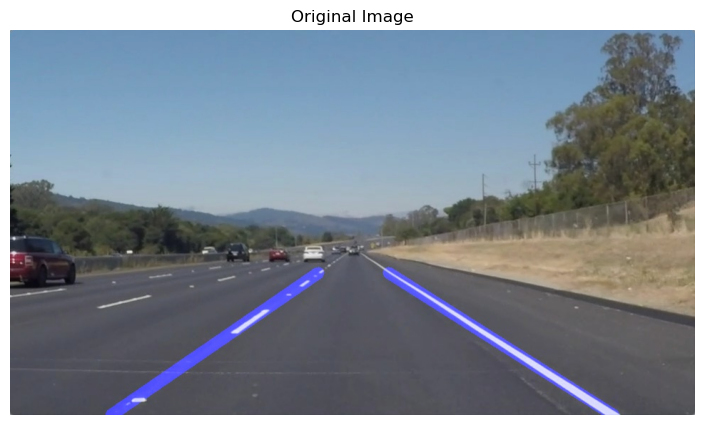

In [4]:
# Display the image
plt.figure(figsize=(10, 5))
plt.imshow(image)
plt.title('Original Image')
plt.axis('off')
plt.show()

In [5]:
# Step 3: Grayscale Conversion
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

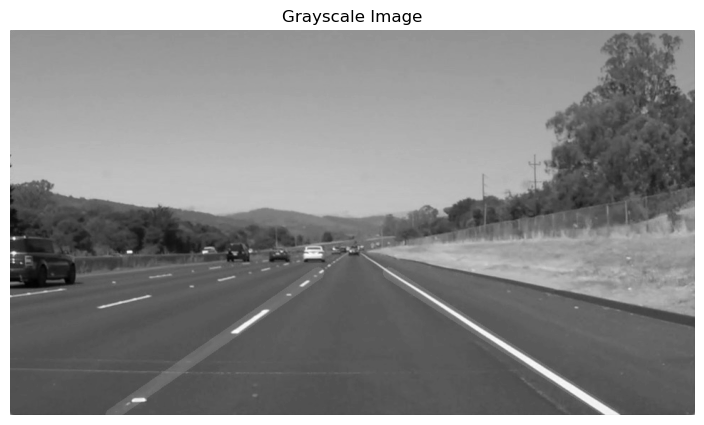

In [6]:
# Display the grayscale image
plt.figure(figsize=(10, 5))
plt.imshow(gray, cmap='gray')
plt.title('Grayscale Image')
plt.axis('off')
plt.show()

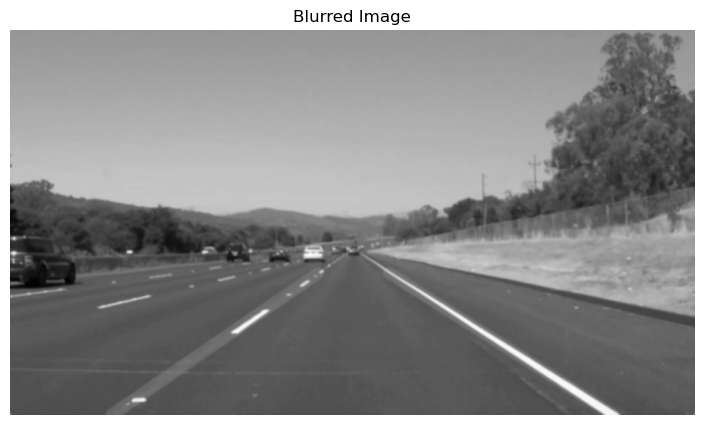

In [7]:
# Step 4: Gaussian Blur
blur = cv2.GaussianBlur(gray, (5, 5), 0)

# Display the blurred image
plt.figure(figsize=(10, 5))
plt.imshow(blur, cmap='gray')
plt.title('Blurred Image')
plt.axis('off')
plt.show()

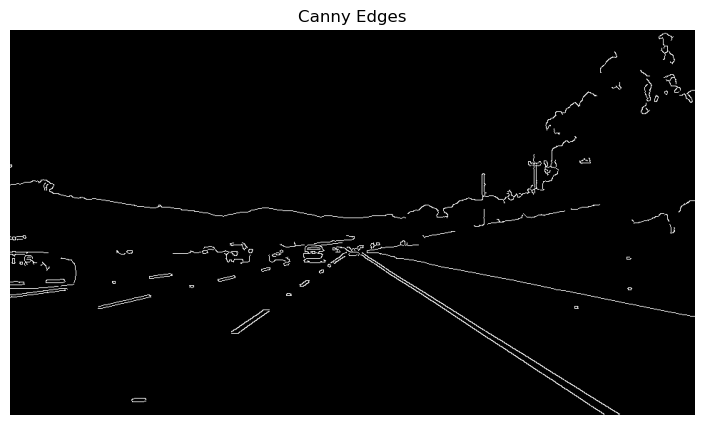

In [8]:
# Step 5: Canny Edge Detection
edges = cv2.Canny(blur, 50, 150)

# Display the edges
plt.figure(figsize=(10, 5))
plt.imshow(edges, cmap='gray')
plt.title('Canny Edges')
plt.axis('off')
plt.show()

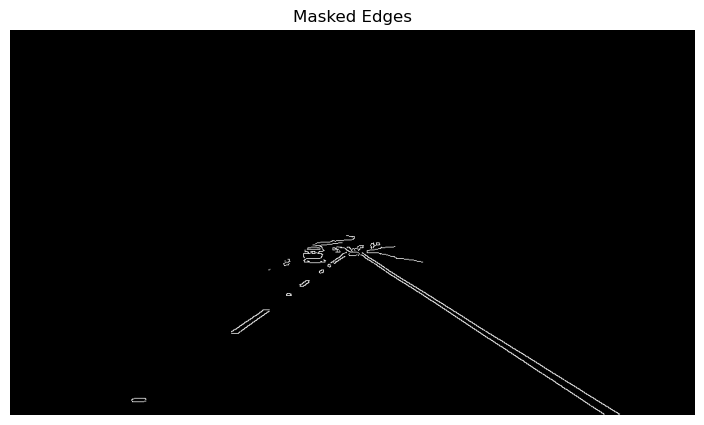

In [9]:
# Step 6: Region of Interest Selection
def region_of_interest(img, vertices):
    mask = np.zeros_like(img)
    cv2.fillPoly(mask, vertices, 255)
    masked_image = cv2.bitwise_and(img, mask)
    return masked_image

height, width = edges.shape
roi_vertices = [
    (0, height),
    (width / 2, height / 2),
    (width, height)
]

masked_edges = region_of_interest(edges, np.array([roi_vertices], np.int32))

# Display the masked edges
plt.figure(figsize=(10, 5))
plt.imshow(masked_edges, cmap='gray')
plt.title('Masked Edges')
plt.axis('off')
plt.show()

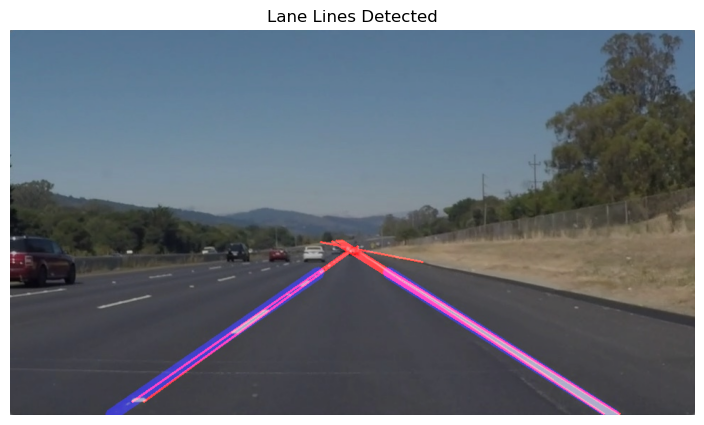

In [10]:
# Step 7: Hough Line Transform for Line Detection
lines = cv2.HoughLinesP(masked_edges, rho=1, theta=np.pi/180, threshold=50, minLineLength=50, maxLineGap=200)

# Function to draw lines on the image
def draw_lines(img, lines, color=[255, 0, 0], thickness=2):
    line_image = np.zeros_like(img)
    if lines is not None:
        for line in lines:
            for x1, y1, x2, y2 in line:
                cv2.line(line_image, (x1, y1), (x2, y2), color, thickness)
    return line_image

line_image = draw_lines(image, lines)

# Combine the original image with the line image
combo_image = cv2.addWeighted(image, 0.8, line_image, 1, 0)

# Display the image with lane lines
plt.figure(figsize=(10, 5))
plt.imshow(combo_image)
plt.title('Lane Lines Detected')
plt.axis('off')
plt.show()